# EDA API / Job Salary Data API

### Kevin Artunduaga - 2216155

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

### Las librerias usadas para el EDA son pandas, json, request, matplotlib (para las graficas) y seaborn.

In [8]:
df_jobs = pd.read_csv("C:/Users/kevin/ETL/Postgres/kaggle/dataJobs_project/API/job_salaries.csv", encoding='ISO-8859-1', delimiter=',')

In [9]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         2229 non-null   object 
 1   job_title        2229 non-null   object 
 2   publisher_name   2229 non-null   object 
 3   publisher_link   2229 non-null   object 
 4   min_salary       2229 non-null   float64
 5   max_salary       2229 non-null   float64
 6   median_salary    2229 non-null   float64
 7   salary_period    2229 non-null   object 
 8   salary_currency  2229 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.9+ KB


De las 9 columnas, 6 son de tipo Varchar y las otras 3 son de tipo decimal o flotante.

In [10]:
df_jobs.head()

,location,job_title,publisher_name,publisher_link,min_salary,max_salary,median_salary,salary_period,salary_currency
0,United States,Project Manager,Glassdoor,https://Glassdoor.com/Project Manager,72499.0,134999.0,95235.0,YEAR,USD
1,United States,Project Manager,Indeed,https://Indeed.com/Project Manager,73199.0,135499.0,95535.0,YEAR,USD
2,United States,Project Manager,Payscale,https://Payscale.com/Project Manager,73299.0,135599.0,95635.0,YEAR,USD
3,United States,Software Engineer,Glassdoor,https://Glassdoor.com/Software Engineer,98778.0,165000.0,123724.0,YEAR,USD
4,United States,Software Engineer,Indeed,https://Indeed.com/Software Engineer,99178.0,165300.0,123924.0,YEAR,USD


Aqui miro las 5 primeras filas de el df de la API y se puede apreciar como se distribuye la informacion en cada una de las filas.

In [11]:
df_jobs.isnull().sum()

location           0
job_title          0
publisher_name     0
publisher_link     0
min_salary         0
max_salary         0
median_salary      0
salary_period      0
salary_currency    0
dtype: int64

Aqui mire la cantidad de nulos por columna y no hay ningun nulo en ninguna de las columnas

In [12]:
df_jobs.describe()

,min_salary,max_salary,median_salary
count,2229.000000,2229.000000,2229.000000
mean,65334.756393,94136.796321,76913.100045
std,21904.733834,39413.113265,26964.620341
min,37056.000000,51766.000000,46405.000000
25%,49637.000000,65250.000000,57178.000000
50%,60594.000000,76890.000000,69007.000000
75%,69610.000000,125118.000000,90961.000000
max,148483.000000,211000.000000,172188.000000


Aqui quise apreciar cada una de las medidas por las variables numericas y lo relevante que se puede apreciar es que el salario mas bajo de min salary es 37025 y que el salario mas alto del max salary es 211000 dolares.

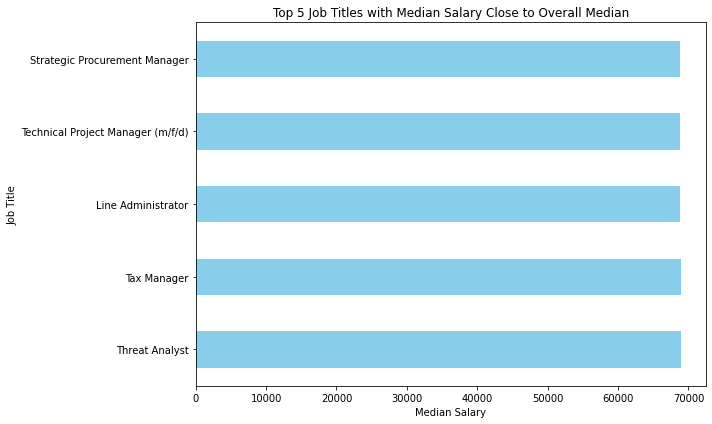

In [13]:
# Agrupa los datos por job_title y calcula la mediana del salario
median_salaries = df_jobs.groupby('job_title')['median_salary'].median().sort_values(ascending=False)

# Calcula la mediana del salario de todos los trabajos
overall_median = df_jobs['median_salary'].median()

# Toma los 5 títulos de trabajo con los salarios medianos más cercanos a la mediana general
top_5_titles = median_salaries[median_salaries <= overall_median].head(5)

# Crea una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crea un gráfico de barras horizontales para los 5 títulos de trabajo
top_5_titles.plot(kind='barh', ax=ax, color='skyblue')

# Configura las etiquetas y el título
ax.set_xlabel('Median Salary')
ax.set_ylabel('Job Title')
ax.set_title('Top 5 Job Titles with Median Salary Close to Overall Median')

# Muestra el gráfico
plt.tight_layout()
plt.show()

Aqui mire los trabajos mas promedios a partir de los trabajos y con un top 5.

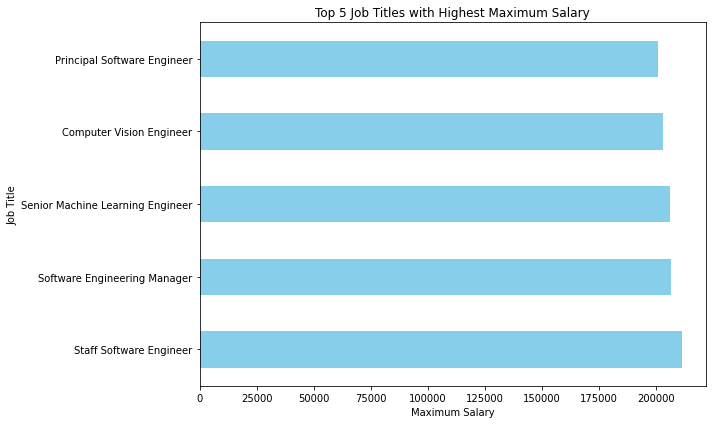

In [14]:
# Agrupa los datos por job_title y calcula el salario máximo
max_salaries = df_jobs.groupby('job_title')['max_salary'].max().sort_values(ascending=False)

top_5_highest_salaries = max_salaries.head(5)

fig, ax = plt.subplots(figsize=(10, 6))

top_5_highest_salaries.plot(kind='barh', ax=ax, color='skyblue')

ax.set_xlabel('Maximum Salary')
ax.set_ylabel('Job Title')
ax.set_title('Top 5 Job Titles with Highest Maximum Salary')

plt.tight_layout()
plt.show()

Para esta grafica se pueden apreciar los salarios mas altos a partir de max salary con la cantidad de dolares.

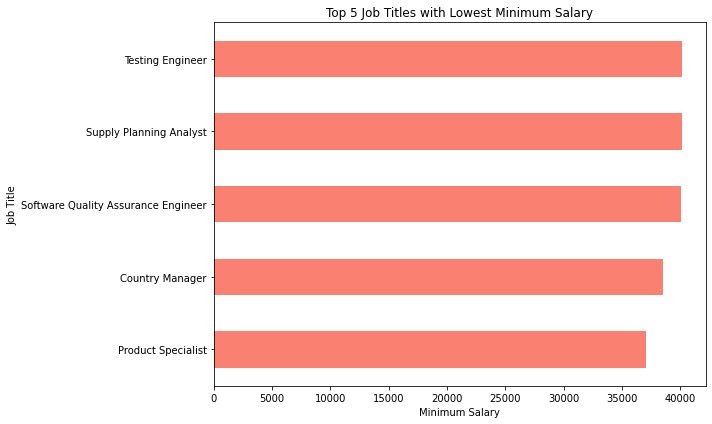

In [15]:
# Agrupa los datos por job_title y calcula el salario mínimo
min_salaries = df_jobs.groupby('job_title')['min_salary'].min().sort_values()

top_5_lowest_salaries = min_salaries.head(5)

fig, ax = plt.subplots(figsize=(10, 6))

top_5_lowest_salaries.plot(kind='barh', ax=ax, color='salmon')

ax.set_xlabel('Minimum Salary')
ax.set_ylabel('Job Title')
ax.set_title('Top 5 Job Titles with Lowest Minimum Salary')

plt.tight_layout()
plt.show()

Aqui hice una grafica del top 5 de los titulos de trabajo con los salarios mas baos a partir de min salary.